In [ ]:
# Import necessary library
import pandas as pd
import os

# Download the file
!wget https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases/cord-19_2022-06-02.tar.gz

# Unzip the file
!tar -xvzf cord-19_2022-06-02.tar.gz


--2024-01-10 18:45:38--  https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases/cord-19_2022-06-02.tar.gz
Resolving ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com (ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com)... 52.92.153.202, 52.92.145.218, 3.5.82.18, ...
Connecting to ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com (ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com)|52.92.153.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18657952487 (17G) [binary/octet-stream]
Saving to: ‘cord-19_2022-06-02.tar.gz’

cord-19_2022-06-02. 100%[===================>]  17.38G  33.8MB/s    in 8m 40s  

2024-01-10 18:54:19 (34.2 MB/s) - ‘cord-19_2022-06-02.tar.gz’ saved [18657952487/18657952487]

2022-06-02/changelog
2022-06-02/cord_19_embeddings.tar.gz
2022-06-02/document_parses.tar.gz
2022-06-02/metadata.csv


In [ ]:

# Depending on the structure of the extracted files, you might need to adjust the root_path.
# Assuming the structure is similar to Kaggle's CORD-19 dataset, you can set the root_path like this:
root_path = '2022-06-02'

# Now, construct the path to metadata.csv
metadata_path = os.path.join(root_path, 'metadata.csv')

# Load the metadata into a Pandas DataFrame
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str,
    'doi': str
})

# Display the first few rows of the DataFrame
meta_df.head()



<ipython-input-2-897f2b3c04a3>:9: DtypeWarning: Columns (1,5,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv(metadata_path, dtype={


cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

## data cleaning (load data into dataframe)

In [ ]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821118 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [ ]:
!tar -xvzf 2022-06-02/document_parses.tar.gz

Streaming output truncated to the last 5000 lines.
document_parses/pdf_json/18e5fc8581de5a95252eec99ea6b86adaead470b.json
document_parses/pmc_json/PMC8896496.xml.json
document_parses/pdf_json/392651c6cf1d60c95aae98f2e48dfed0dde5427e.json
document_parses/pmc_json/PMC7511034.xml.json
document_parses/pdf_json/3dd99e247573bf5be8a857fae05ac4a540dec6ee.json
document_parses/pmc_json/PMC8514250.xml.json
document_parses/pdf_json/5408fd760eabe424a82952e5557142ef97b4f35d.json
document_parses/pmc_json/PMC8866000.xml.json
document_parses/pdf_json/3f61572d76ba87877feded40080e74ed147c86f1.json
document_parses/pmc_json/PMC7525756.xml.json
document_parses/pdf_json/97d4734c65a5d32fc204013506522f4c6052039b.json
document_parses/pmc_json/PMC7603037.xml.json
document_parses/pdf_json/ac449f4c71317df4387841b136dac53f6235be8f.json
document_parses/pmc_json/PMC7760998.xml.json
document_parses/pdf_json/e53df63221fbac884a36801a5cc2e0a2343f5a7b.json
document_parses/pmc_json/PMC8015747.xml.json
document_parses/pdf_j

In [ ]:
all_json = ! ls document_parses/pdf_json
len(all_json)

200607

In [ ]:
all_json = [ "document_parses/pdf_json/" + s for s in all_json]

In [ ]:
all_json = [line.split()[0] for line in all_json]


In [ ]:
len(all_json)

200607

In [ ]:
import json
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

0000028b5cc154f68b8a269f6578f21e31f62977: ... According to current live statistics at the time of editing this letter, Russia has been the third country in the world to be affected by COVID-19 with both new cases and death rates rising. It remain...


In [ ]:
len(all_json)

200607

In [ ]:
from tqdm import tqdm
all_json_clean = list()
for idx, entry in tqdm(enumerate(all_json), total=len(all_json)):

    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip

    if len(content.body_text) == 0:
        continue

    all_json_clean.append(all_json[idx])



100%|██████████| 200607/200607 [12:17<00:00, 272.05it/s]


In [ ]:
len(all_json_clean)

200607

In [ ]:
all_json = all_json_clean
len(all_json)

200607

In [ ]:
import random

random.seed(42)

all_json = random.sample(all_json, 30000)

In [ ]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [ ]:
from tqdm import tqdm
dict_ = {'paper_id': [], 'doi': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': [], 'publish_time': []}

for idx, entry in tqdm(enumerate(all_json), total=len(all_json)):

    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip

    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    if len(content.body_text) == 0:
        continue
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)

        # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0:
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 300 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)

    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # more than 2 authors, may be problem when plotting, so take first 2 append with ...
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
                      # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])

    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])

    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])

    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])

    # add publish_time
    try:
        publish_time = meta_data['publish_time'].values[0]
        # Perform any necessary cleaning/formatting on publish_time here
        dict_['publish_time'].append(publish_time)
    except Exception as e:
        dict_['publish_time'].append("Not available")

df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary', 'publish_time'])
df_covid.head()


100%|██████████| 30000/30000 [56:04<00:00,  8.92it/s]


paper_id                         doi  \
0  6af509e7133d2fa360e778dc854c864ec404a719       10.3892/ijo.2022.5349   
1  0435caf29bf128e45eb6e38609763a9916d907fc           10.1002/jmv.27172   
2  7bf3799c6d075de2f71570ecaa4b10999b124979  10.1186/s13613-021-00935-0   
3  29258f9dbbf5d401b309f488f630d13834804703  10.1186/s40249-021-00796-6   
4  25827e311fb7ab64e03b6953b1ce1058804571df  10.1186/s12939-021-01559-3   

                                            abstract  \
0  Breast and ovarian cancer represent two of the...   
1  required mechanical ventilation. She left the ...   
2  Background: Ineffective triggering is frequent...   
3  Background: Malaria and neglected communicable...   
4  Background: Social mobilisation is potentially...   

                                           body_text  \
0  Breast and ovarian cancer are two of the most ...   
1  Immunostimulation with interferon-γ in protrac...   
2  Ineffective triggering is the most frequent as...   
3  Background Neglected tropical diseases (NTDs) ...   
4  Non-communicable diseases (NCDs) are a definin...   

                                             authors  \
0   Lavoro, Alessandro.  Scalisi, Aurora. <br>Can...   
1   Lukaszewicz, Anne‐Claire.  Venet, Fabienne. <...   
2   Haudebourg, Anne-Fleur.  Maraffi, Tommaso. <b...   
3   Nweze, Justus Amuche.  Mbaoji, Florence N..  ...   
4   Caperon, Lizzie.  Arakelyan, Stella. <br>Inno...   

                                               title              journal  \
0   Identification of the most common BRCA<br>alt...          Int J Oncol   
1   Immunostimulation with interferon‐γ in<br>pro...          J Med Virol   
2   Refractory ineffective triggering during<br>p...   Ann Intensive Care   
3   Potentials of marine natural products against...   Infect Dis Poverty   
4   Identifying opportunities to engage<br>commun...  Int J Equity Health   

                                    abstract_summary publish_time  
0   Breast and ovarian cancer represent two of th...   2022-04-06  
1   required mechanical ventilation. She left the...   2021-07-08  
2   Background: Ineffective triggering is<br>freq...   2021-10-20  
3   Background: Malaria and neglected<br>communic...   2021-01-22  
4   Background: Social mobilisation is<br>potenti...   2021-10-09

In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26106 entries, 0 to 26105
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          26106 non-null  object
 1   doi               25181 non-null  object
 2   abstract          26106 non-null  object
 3   body_text         26106 non-null  object
 4   authors           25886 non-null  object
 5   title             26105 non-null  object
 6   journal           23798 non-null  object
 7   abstract_summary  26106 non-null  object
 8   publish_time      26106 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#save the dataframe for covid
df_covid.to_csv('df_covid.csv', index=False)
from google.colab import drive
drive.mount('/content/drive')

import shutil

# Copy the CSV file to a specific location in Google Drive
shutil.copy('df_covid.csv', '/content/drive/MyDrive/df_covid.csv')

In [ ]:
df = df_covid.copy()
df.dropna(inplace=True)
df.info()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df_covid = pd.read_csv('/content/drive/MyDrive/df_covid.csv')


Mounted at /content/drive


In [ ]:

df = df_covid.copy()
df.dropna(inplace=True)

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=1e76623166ba8153d4518f23ba87e03f068edfcac8964267379c1a74fefc8760
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")

    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:

            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    languages.append(lang)

100%|██████████| 16393/16393 [02:30<00:00, 108.61it/s]


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16393 entries, 0 to 26105
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          16393 non-null  object
 1   doi               16393 non-null  object
 2   abstract          16393 non-null  object
 3   body_text         16393 non-null  object
 4   authors           16393 non-null  object
 5   title             16393 non-null  object
 6   journal           16393 non-null  object
 7   abstract_summary  16393 non-null  object
 8   publish_time      16393 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


paper_id                         doi  \
0  6af509e7133d2fa360e778dc854c864ec404a719       10.3892/ijo.2022.5349   
1  0435caf29bf128e45eb6e38609763a9916d907fc           10.1002/jmv.27172   
2  7bf3799c6d075de2f71570ecaa4b10999b124979  10.1186/s13613-021-00935-0   
3  29258f9dbbf5d401b309f488f630d13834804703  10.1186/s40249-021-00796-6   
4  25827e311fb7ab64e03b6953b1ce1058804571df  10.1186/s12939-021-01559-3   

                                            abstract  \
0  Breast and ovarian cancer represent two of the...   
1  required mechanical ventilation. She left the ...   
2  Background: Ineffective triggering is frequent...   
3  Background: Malaria and neglected communicable...   
4  Background: Social mobilisation is potentially...   

                                           body_text  \
0  Breast and ovarian cancer are two of the most ...   
1  Immunostimulation with interferon-γ in protrac...   
2  Ineffective triggering is the most frequent as...   
3  Background Neglected tropical diseases (NTDs) ...   
4  Non-communicable diseases (NCDs) are a definin...   

                                             authors  \
0   Lavoro, Alessandro.  Scalisi, Aurora. <br>Can...   
1   Lukaszewicz, Anne‐Claire.  Venet, Fabienne. <...   
2   Haudebourg, Anne-Fleur.  Maraffi, Tommaso. <b...   
3   Nweze, Justus Amuche.  Mbaoji, Florence N..  ...   
4   Caperon, Lizzie.  Arakelyan, Stella. <br>Inno...   

                                               title              journal  \
0   Identification of the most common BRCA<br>alt...          Int J Oncol   
1   Immunostimulation with interferon‐γ in<br>pro...          J Med Virol   
2   Refractory ineffective triggering during<br>p...   Ann Intensive Care   
3   Potentials of marine natural products against...   Infect Dis Poverty   
4   Identifying opportunities to engage<br>commun...  Int J Equity Health   

                                    abstract_summary publish_time  
0   Breast and ovarian cancer represent two of th...   2022-04-06  
1   required mechanical ventilation. She left the...   2021-07-08  
2   Background: Ineffective triggering is<br>freq...   2021-10-20  
3   Background: Malaria and neglected<br>communic...   2021-01-22  
4   Background: Social mobilisation is<br>potenti...   2021-10-09

In [ ]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)

print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 16393

{'ca': 2,
 'de': 105,
 'en': 16144,
 'es': 72,
 'fa': 1,
 'fr': 41,
 'it': 6,
 'nl': 9,
 'pt': 11,
 'tr': 1,
 'unknown': 1}


In [ ]:
df['language'] = languages
df = df[df['language'] == 'en'] # we only use English subsamples in our analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16144 entries, 0 to 26105
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          16144 non-null  object
 1   doi               16144 non-null  object
 2   abstract          16144 non-null  object
 3   body_text         16144 non-null  object
 4   authors           16144 non-null  object
 5   title             16144 non-null  object
 6   journal           16144 non-null  object
 7   abstract_summary  16144 non-null  object
 8   publish_time      16144 non-null  object
 9   language          16144 non-null  object
dtypes: object(10)
memory usage: 1.4+ MB


In [ ]:
!pip install  https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 11.0 MB/s eta 0:00:00
  Created wheel for en-core-web-sm: filename=en_core_web_sm-3.0.0-py3-none-any.whl size=13704303 sha256=2ea1ab93116c8220d048867e4402fa17cc25a1b89f91118aee1435ed96b9a552
  Stored in directory: /root/.cache/pip/wheels/02/71/33/ba353e928efc99d80cd9a851dfcfb11fab8a04839fc4e63088
Successfully built en-core-web-sm
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uni

In [ ]:
#NLP
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm


In [ ]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)

custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure',
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.',
    'al.', 'Elsevier', 'PMC', 'CZI'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [ ]:
# Parser
parser = en_core_web_sm.load(disable=["tagger", "ner"])
parser.max_length = 7000000



/usr/local/lib/python3.10/dist-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [ ]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [ ]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

  0%|          | 0/16144 [00:00<?, ?it/s][2024-01-10 21:18:54,223] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'Breast'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2024-01-10 21:18:54,227] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'and'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2024-01-10 21:18:54,231] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'ovarian'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
[2024-01-10 21:18:54,234] [WARNING] [W108] The rule-based lemmatizer did not find POS annotation for the token 'cancer'. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_rule

In [ ]:
# save the df here
df.to_csv('/content/drive/MyDrive/df_covid_processed.csv')

df.head()

In [ ]:
#read the df here
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/df_covid_processed.csv')
df2 = pd.read_csv('/content/drive/MyDrive/df_covid.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

Unnamed: 0                                  paper_id  \
0           0  6af509e7133d2fa360e778dc854c864ec404a719   
1           1  0435caf29bf128e45eb6e38609763a9916d907fc   
2           2  7bf3799c6d075de2f71570ecaa4b10999b124979   
3           3  29258f9dbbf5d401b309f488f630d13834804703   
4           4  25827e311fb7ab64e03b6953b1ce1058804571df   

                          doi  \
0       10.3892/ijo.2022.5349   
1           10.1002/jmv.27172   
2  10.1186/s13613-021-00935-0   
3  10.1186/s40249-021-00796-6   
4  10.1186/s12939-021-01559-3   

                                            abstract  \
0  Breast and ovarian cancer represent two of the...   
1  required mechanical ventilation. She left the ...   
2  Background: Ineffective triggering is frequent...   
3  Background: Malaria and neglected communicable...   
4  Background: Social mobilisation is potentially...   

                                           body_text  \
0  Breast and ovarian cancer are two of the most ...   
1  Immunostimulation with interferon-γ in protrac...   
2  Ineffective triggering is the most frequent as...   
3  Background Neglected tropical diseases (NTDs) ...   
4  Non-communicable diseases (NCDs) are a definin...   

                                             authors  \
0   Lavoro, Alessandro.  Scalisi, Aurora. <br>Can...   
1   Lukaszewicz, Anne‐Claire.  Venet, Fabienne. <...   
2   Haudebourg, Anne-Fleur.  Maraffi, Tommaso. <b...   
3   Nweze, Justus Amuche.  Mbaoji, Florence N..  ...   
4   Caperon, Lizzie.  Arakelyan, Stella. <br>Inno...   

                                               title              journal  \
0   Identification of the most common BRCA<br>alt...          Int J Oncol   
1   Immunostimulation with interferon‐γ in<br>pro...          J Med Virol   
2   Refractory ineffective triggering during<br>p...   Ann Intensive Care   
3   Potentials of marine natural products against...   Infect Dis Poverty   
4   Identifying opportunities to engage<br>commun...  Int J Equity Health   

                                    abstract_summary language  \
0   Breast and ovarian cancer represent two of th...       en   
1   required mechanical ventilation. She left the...       en   
2   Background: Ineffective triggering is<br>freq...       en   
3   Background: Malaria and neglected<br>communic...       en   
4   Background: Social mobilisation is<br>potenti...       en   

                                      processed_text  
0  breast ovarian cancer common malignancies affe...  
1  immunostimulation interferon γ protracted sars...  
2  ineffective triggering frequent asynchrony pre...  
3  background neglected tropical diseases ntds ca...  
4  non communicable diseases ncds defining proble...

In [ ]:
df2.head()

paper_id                         doi  \
0  6af509e7133d2fa360e778dc854c864ec404a719       10.3892/ijo.2022.5349   
1  0435caf29bf128e45eb6e38609763a9916d907fc           10.1002/jmv.27172   
2  7bf3799c6d075de2f71570ecaa4b10999b124979  10.1186/s13613-021-00935-0   
3  29258f9dbbf5d401b309f488f630d13834804703  10.1186/s40249-021-00796-6   
4  25827e311fb7ab64e03b6953b1ce1058804571df  10.1186/s12939-021-01559-3   

                                            abstract  \
0  Breast and ovarian cancer represent two of the...   
1  required mechanical ventilation. She left the ...   
2  Background: Ineffective triggering is frequent...   
3  Background: Malaria and neglected communicable...   
4  Background: Social mobilisation is potentially...   

                                           body_text  \
0  Breast and ovarian cancer are two of the most ...   
1  Immunostimulation with interferon-γ in protrac...   
2  Ineffective triggering is the most frequent as...   
3  Background Neglected tropical diseases (NTDs) ...   
4  Non-communicable diseases (NCDs) are a definin...   

                                             authors  \
0   Lavoro, Alessandro.  Scalisi, Aurora. <br>Can...   
1   Lukaszewicz, Anne‐Claire.  Venet, Fabienne. <...   
2   Haudebourg, Anne-Fleur.  Maraffi, Tommaso. <b...   
3   Nweze, Justus Amuche.  Mbaoji, Florence N..  ...   
4   Caperon, Lizzie.  Arakelyan, Stella. <br>Inno...   

                                               title              journal  \
0   Identification of the most common BRCA<br>alt...          Int J Oncol   
1   Immunostimulation with interferon‐γ in<br>pro...          J Med Virol   
2   Refractory ineffective triggering during<br>p...   Ann Intensive Care   
3   Potentials of marine natural products against...   Infect Dis Poverty   
4   Identifying opportunities to engage<br>commun...  Int J Equity Health   

                                    abstract_summary publish_time  
0   Breast and ovarian cancer represent two of th...   2022-04-06  
1   required mechanical ventilation. She left the...   2021-07-08  
2   Background: Ineffective triggering is<br>freq...   2021-10-20  
3   Background: Malaria and neglected<br>communic...   2021-01-22  
4   Background: Social mobilisation is<br>potenti...   2021-10-09

In [ ]:
df = df.merge(df2[['paper_id', 'publish_time']], on='paper_id', how='left')

In [ ]:
df.head()

Unnamed: 0                                  paper_id  \
0           0  6af509e7133d2fa360e778dc854c864ec404a719   
1           1  0435caf29bf128e45eb6e38609763a9916d907fc   
2           2  7bf3799c6d075de2f71570ecaa4b10999b124979   
3           3  29258f9dbbf5d401b309f488f630d13834804703   
4           4  25827e311fb7ab64e03b6953b1ce1058804571df   

                          doi  \
0       10.3892/ijo.2022.5349   
1           10.1002/jmv.27172   
2  10.1186/s13613-021-00935-0   
3  10.1186/s40249-021-00796-6   
4  10.1186/s12939-021-01559-3   

                                            abstract  \
0  Breast and ovarian cancer represent two of the...   
1  required mechanical ventilation. She left the ...   
2  Background: Ineffective triggering is frequent...   
3  Background: Malaria and neglected communicable...   
4  Background: Social mobilisation is potentially...   

                                           body_text  \
0  Breast and ovarian cancer are two of the most ...   
1  Immunostimulation with interferon-γ in protrac...   
2  Ineffective triggering is the most frequent as...   
3  Background Neglected tropical diseases (NTDs) ...   
4  Non-communicable diseases (NCDs) are a definin...   

                                             authors  \
0   Lavoro, Alessandro.  Scalisi, Aurora. <br>Can...   
1   Lukaszewicz, Anne‐Claire.  Venet, Fabienne. <...   
2   Haudebourg, Anne-Fleur.  Maraffi, Tommaso. <b...   
3   Nweze, Justus Amuche.  Mbaoji, Florence N..  ...   
4   Caperon, Lizzie.  Arakelyan, Stella. <br>Inno...   

                                               title              journal  \
0   Identification of the most common BRCA<br>alt...          Int J Oncol   
1   Immunostimulation with interferon‐γ in<br>pro...          J Med Virol   
2   Refractory ineffective triggering during<br>p...   Ann Intensive Care   
3   Potentials of marine natural products against...   Infect Dis Poverty   
4   Identifying opportunities to engage<br>commun...  Int J Equity Health   

                                    abstract_summary language  \
0   Breast and ovarian cancer represent two of th...       en   
1   required mechanical ventilation. She left the...       en   
2   Background: Ineffective triggering is<br>freq...       en   
3   Background: Malaria and neglected<br>communic...       en   
4   Background: Social mobilisation is<br>potenti...       en   

                                      processed_text publish_time  
0  breast ovarian cancer common malignancies affe...   2022-04-06  
1  immunostimulation interferon γ protracted sars...   2021-07-08  
2  ineffective triggering frequent asynchrony pre...   2021-10-20  
3  background neglected tropical diseases ntds ca...   2021-01-22  
4  non communicable diseases ncds defining proble...   2021-10-09

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8131 entries, 0 to 8130
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        8131 non-null   int64 
 1   paper_id          8131 non-null   object
 2   doi               8131 non-null   object
 3   abstract          8131 non-null   object
 4   body_text         8131 non-null   object
 5   authors           8131 non-null   object
 6   title             8131 non-null   object
 7   journal           8131 non-null   object
 8   abstract_summary  8131 non-null   object
 9   language          8131 non-null   object
 10  processed_text    8131 non-null   object
 11  publish_time      7897 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Clus†ering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):

    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [ ]:
text = df['processed_text'].values
max_features = 2**12

X = vectorize(text, max_features)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(8131, 2230)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

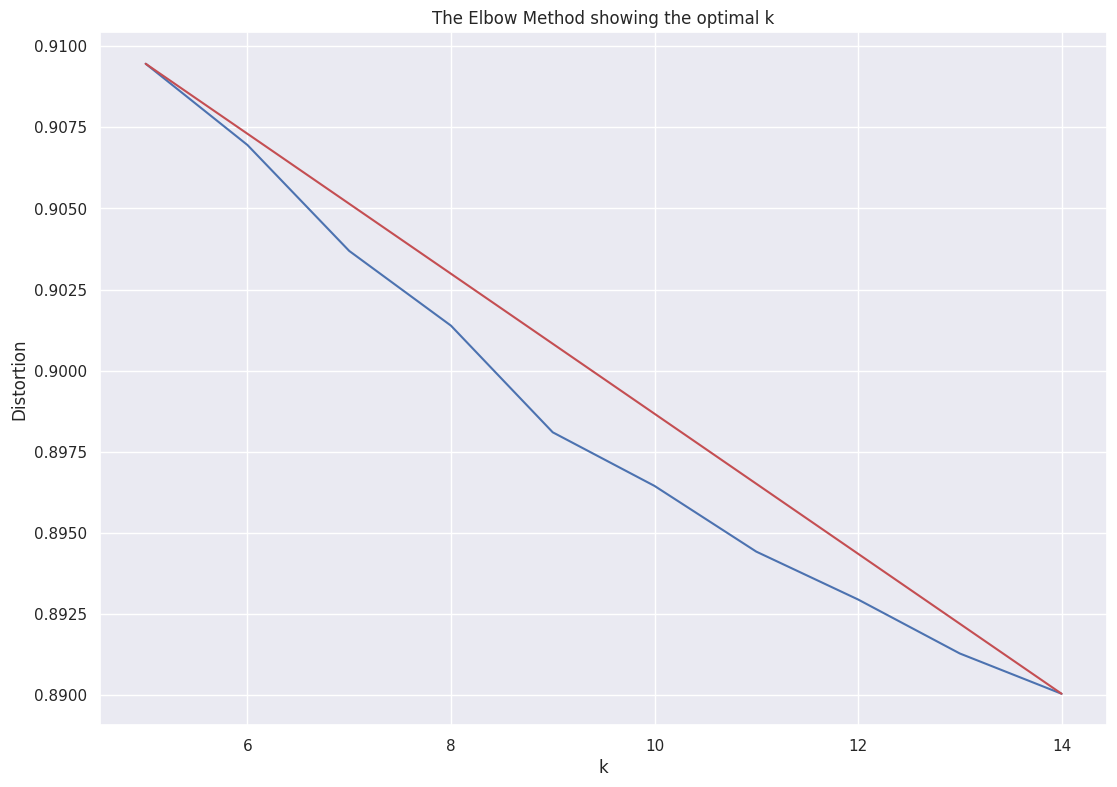

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# run kmeans with many different k
distortions = []
K = range(5, 15)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.savefig('/content/drive/My Drive/elbow_method.png')

plt.show()

In [ ]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


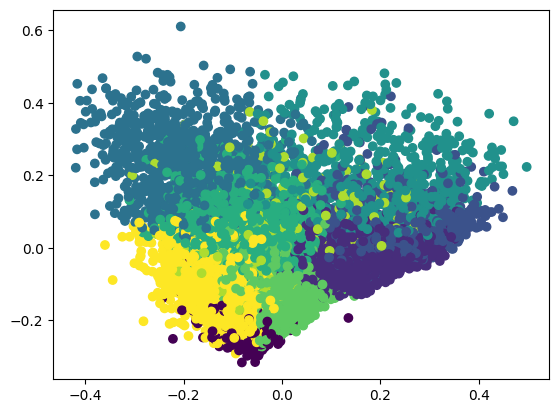

In [ ]:
#show the graph for k-means cluster (with x_reduced[:0] as the x-axis and y_pred as the y-axis)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8131 samples in 0.028s...
[t-SNE] Computed neighbors for 8131 samples in 18.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8131
[t-SNE] Computed conditional probabilities for sample 2000 / 8131
[t-SNE] Computed conditional probabilities for sample 3000 / 8131
[t-SNE] Computed conditional probabilities for sample 4000 / 8131
[t-SNE] Computed conditional probabilities for sample 5000 / 8131
[t-SNE] Computed conditional probabilities for sample 6000 / 8131
[t-SNE] Computed conditional probabilities for sample 7000 / 8131
[t-SNE] Computed conditional probabilities for sample 8000 / 8131
[t-SNE] Computed conditional probabilities for sample 8131 / 8131
[t-SNE] Mean sigma: 0.333077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.927521
[t-SNE] KL divergence after 1000 iterations: 2.067320


<ipython-input-22-c485ac41ff0e>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= X_embedded[:,0], y = X_embedded[:,1], palette=palette)


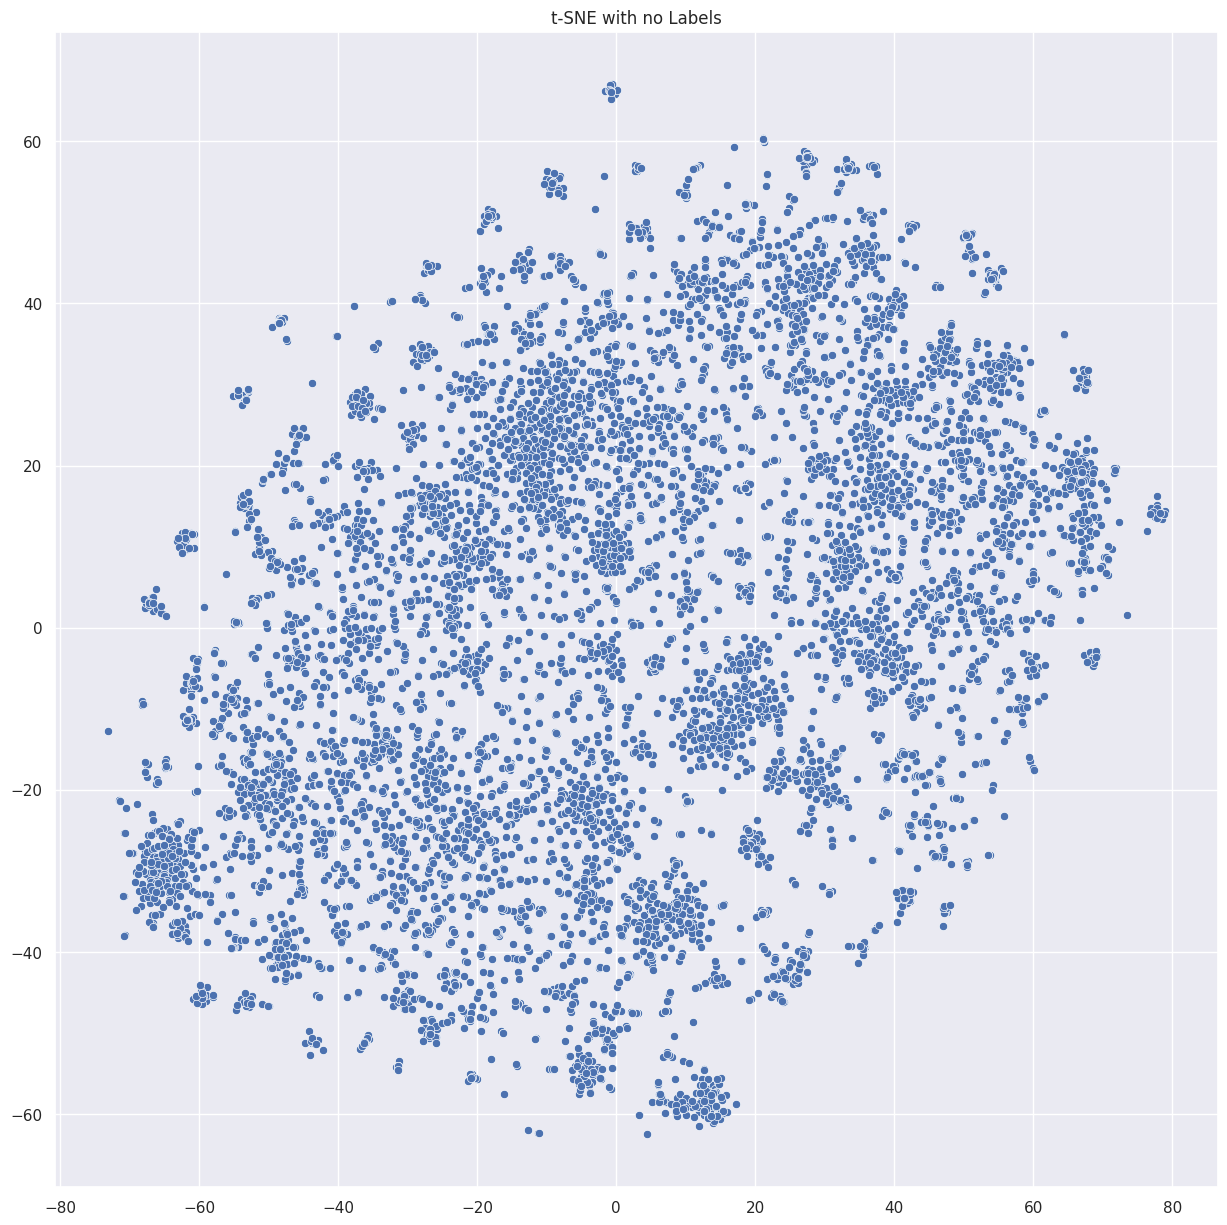

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x= X_embedded[:,0], y = X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

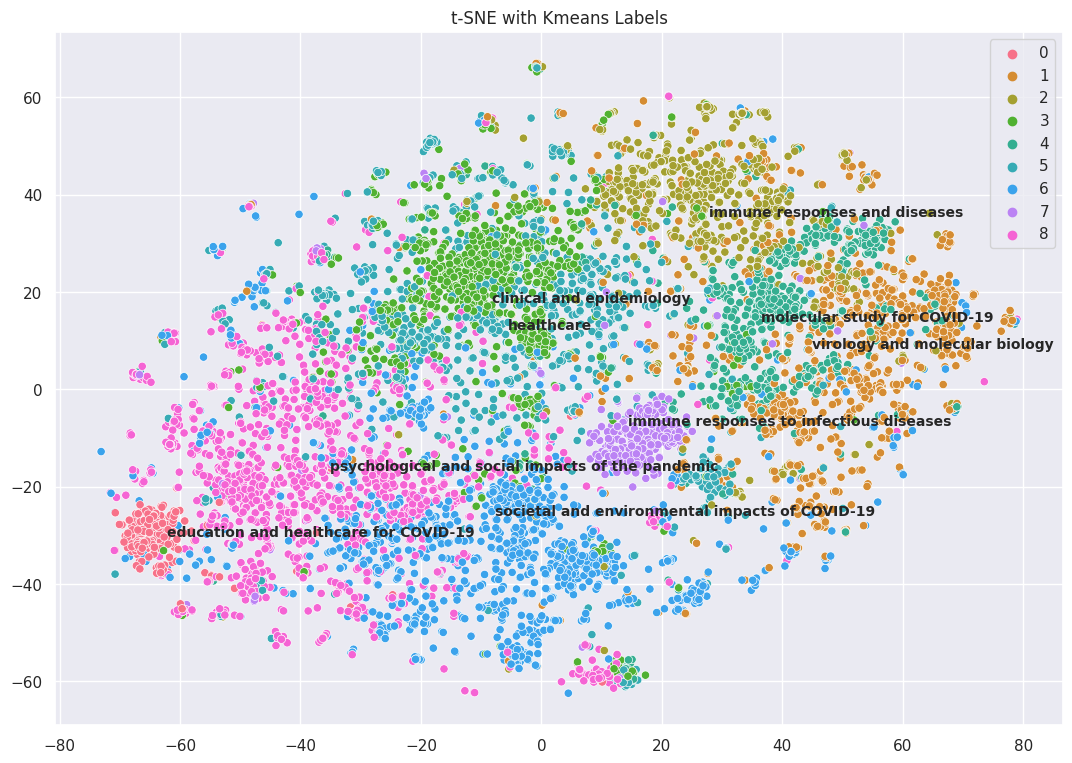

In [ ]:
# adding the labels for the cluster plots
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = palette = sns.color_palette("husl", 9)

cluster_labels = [
    'education and healthcare for COVID-19',
    'virology and molecular biology',
    'immune responses and diseases',
    'clinical and epidemiology',
    'molecular study for COVID-19',
    'healthcare',
    'societal and environmental impacts of COVID-19',
    'immune responses to infectious diseases',
    'psychological and social impacts of the pandemic'
]

# plot
sns.scatterplot(x=X_embedded[:,0], y= X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne_all.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne_all.png')

plt.show()

## LDA for keywods

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizers = []

for ii in range(0, 9):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [ ]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)


In [ ]:
len(vectorized_data)

9

In [ ]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 20


lda_models = []

for ii in range(0, 9):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)

lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=42, verbose=False)

In [ ]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_cluster))

    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8


In [ ]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []

    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names_out()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])

    keywords.sort(key = lambda x: x[1])
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [ ]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))


Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8


In [ ]:
all_keywords[0][:19]

['teachers',
 'health',
 'covid-',
 'medical',
 'research',
 'writing',
 'teaching',
 'school',
 'different',
 'arts',
 'use',
 'substance',
 'substances',
 'vaccines',
 'political',
 'integration',
 'scientific',
 'samples',
 'civic']

In [ ]:
f=open('topics.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

## Results
Cluster 0: Focuses on the impact of COVID-19 on education and healthcare, touching on topics like teaching, medical research, and vaccination (education and healthcare for COVID-19).

Cluster 1: Centers around virology and molecular biology, discussing aspects like virus structure, genetic sequencing, and vaccine development (virology and molecular biology).

Cluster 2: Involves immune responses and diseases, highlighting topics like viral infections, cancer research, and immunological aspects of diseases (immune responses and diseases).

Cluster 3: Addresses the clinical and epidemiological aspects of severe diseases, including symptoms, mortality rates, and pandemic management (clinical and epidemiology).

Cluster 4: Relates to the molecular study of COVID-19, focusing on cell binding, antibody response, and genetic aspects of the virus (molecular study for COVID-19).

Cluster 5: Encompasses broader healthcare topics, including cancer treatment, hospital care, and various diseases and therapies (healthcare).

Cluster 6: Deals with societal and environmental impacts of COVID-19, including economic effects, policy, and public health measures (societal and environmental impacts of COVID-19).

Cluster 7: Focuses on immune responses to infectious diseases, particularly in special populations like pregnant women (immune responses to infectious diseases).

Cluster 8: Discusses the psychological and social impacts of the pandemic, including anxiety, stress, and the effect on various demographics (psychological and social impacts of the pandemic).

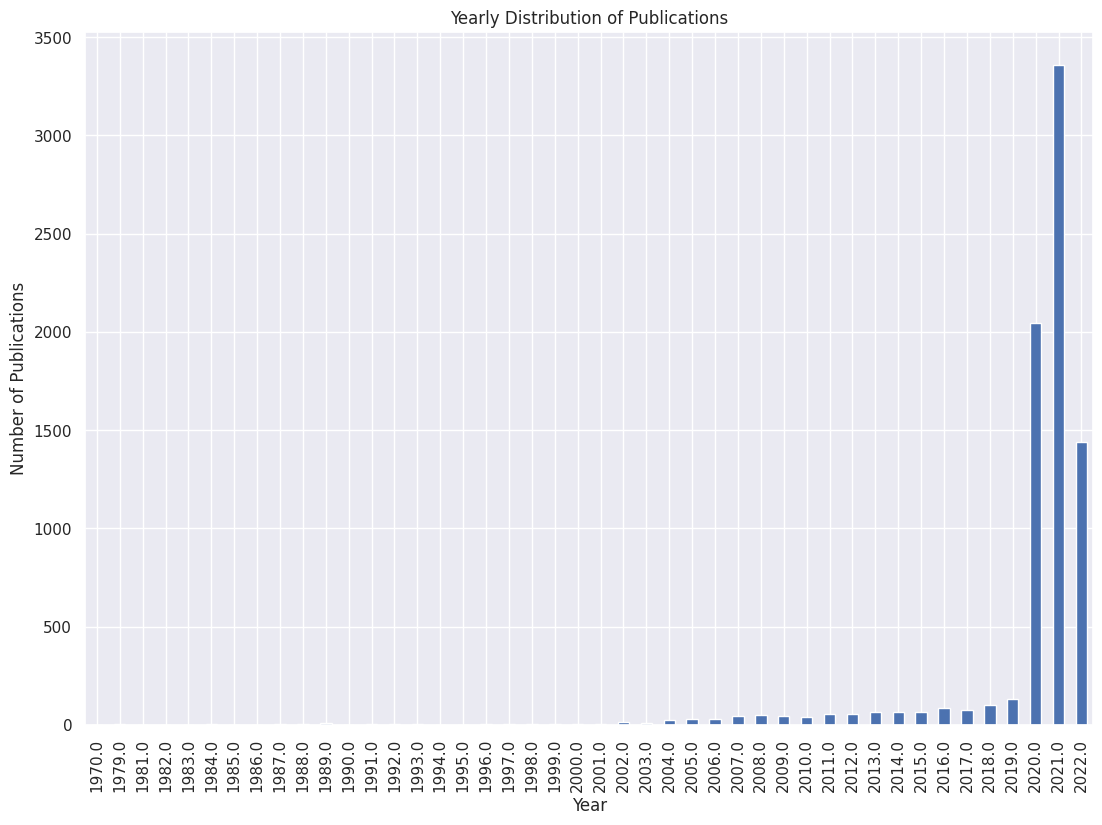

In [ ]:
#select the subset of the dataset for specific dates
import pandas as pd

# Convert the 'publish_time' column to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Now you can perform datetime-specific operations
# For example, to see the distribution by year:
df['publish_time'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Yearly Distribution of Publications')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.savefig("distribution_of_publications.png")
plt.savefig('/content/drive/My Drive/distribution_of_publications.png')

plt.show()



In [ ]:
df_subset = df[df['publish_time'].dt.year >= 2020]

# Create year and month columns
df_subset['year'] = df_subset['publish_time'].dt.year
df_subset['month'] = df_subset['publish_time'].dt.month

# Group by year and month and count occurrences
distribution = df_subset.groupby(['year', 'month']).size()

# Plot
distribution.plot(kind='bar', figsize=(15, 7), color='skyblue')
plt.title('Distribution of Publish Time After 2020')
plt.xlabel('Year, Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig("distribution_of_publication_after_2020.png")
plt.savefig('/content/drive/My Drive/distribution_of_publication_after_2020.png')
plt.show()


<ipython-input-73-d183ded05b06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['year'] = df_subset['publish_time'].dt.year
<ipython-input-73-d183ded05b06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['month'] = df_subset['publish_time'].dt.month


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8131 entries, 0 to 8130
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        8131 non-null   int64         
 1   paper_id          8131 non-null   object        
 2   doi               8131 non-null   object        
 3   abstract          8131 non-null   object        
 4   body_text         8131 non-null   object        
 5   authors           8131 non-null   object        
 6   title             8131 non-null   object        
 7   journal           8131 non-null   object        
 8   abstract_summary  8131 non-null   object        
 9   language          8131 non-null   object        
 10  processed_text    8131 non-null   object        
 11  publish_time      7897 non-null   datetime64[ns]
 12  y                 8131 non-null   int32         
 13  year              7897 non-null   float64       
 14  month             7897 n

In [ ]:
# put X_embedded[:,0], X_embedded[:,1], and y_pred into dataframe
df['x1'] = X_embedded[:,0]
df['x2'] = X_embedded[:,1]
df['y_pred'] = y_pred
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8131 entries, 0 to 8130
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        8131 non-null   int64         
 1   paper_id          8131 non-null   object        
 2   doi               8131 non-null   object        
 3   abstract          8131 non-null   object        
 4   body_text         8131 non-null   object        
 5   authors           8131 non-null   object        
 6   title             8131 non-null   object        
 7   journal           8131 non-null   object        
 8   abstract_summary  8131 non-null   object        
 9   language          8131 non-null   object        
 10  processed_text    8131 non-null   object        
 11  publish_time      7897 non-null   datetime64[ns]
 12  y                 8131 non-null   int32         
 13  year              7897 non-null   float64       
 14  month             7897 n

In [ ]:
# output the graphs
# select the papers published before 2020
df_subset1 = df[df['publish_time'].dt.year < 2020]

# plot the graphs
sns.scatterplot(x=df_subset1['x1'], y=df_subset1['x2'], hue=df_subset1['y_pred'], legend='full', palette= palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels (Papers before 2020)')
plt.savefig("improved_cluster_tsne.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne.png')
plt.show()

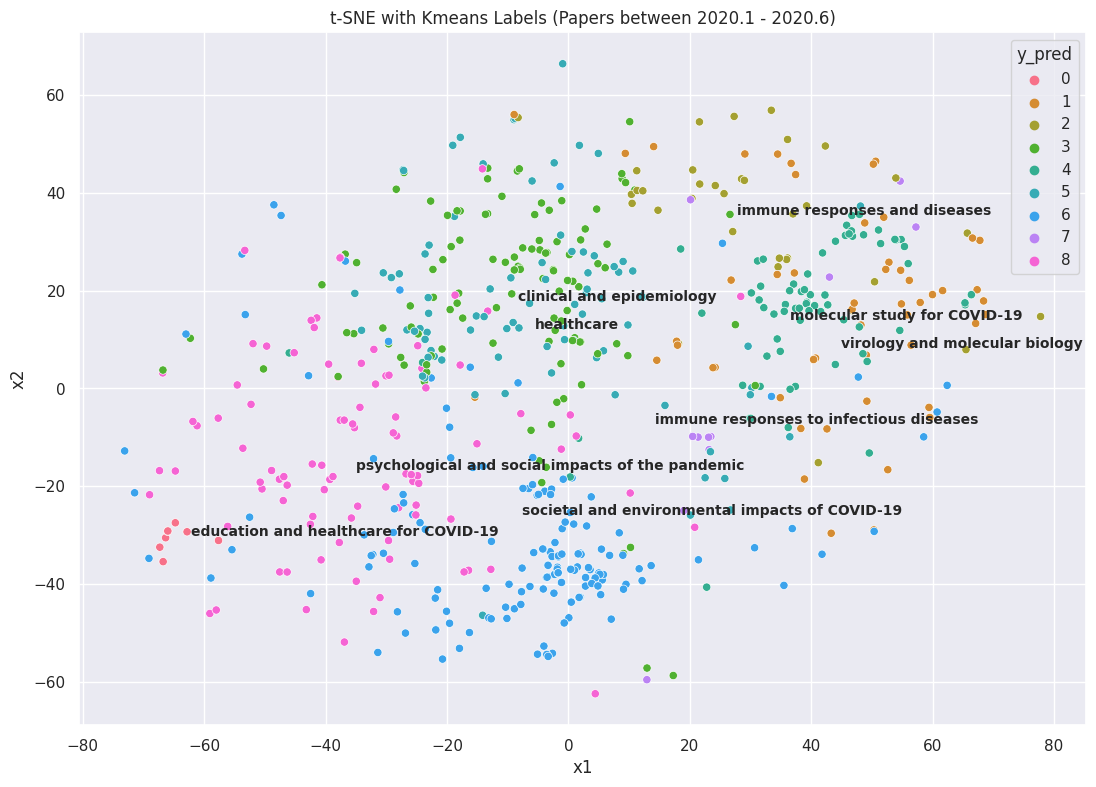

In [ ]:
# plot the graphs for papers between 2020.1 - 2020.6
df_subset2 = df[(df['publish_time'].dt.year == 2020) & (df['publish_time'].dt.month < 7)]

# plot the graphs

sns.scatterplot(x=df_subset2['x1'], y=df_subset2['x2'], hue=df_subset2['y_pred'], legend='full', palette= palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels (Papers between 2020.1 - 2020.6)')
plt.savefig("improved_cluster_tsne_2.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne_2.png')
plt.show()


In [ ]:
# plot the graphs for papers between 2020.7 - 2020.12
df_subset3 = df[(df['publish_time'].dt.year == 2020) & (df['publish_time'].dt.month > 7)]

# plot the graphs
sns.scatterplot(x=df_subset3['x1'], y=df_subset3['x2'], hue=df_subset3['y_pred'], legend='full', palette= palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels (Papers between 2020.7 - 2020.12)')
plt.savefig("improved_cluster_tsne_3.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne_3.png')
plt.show()

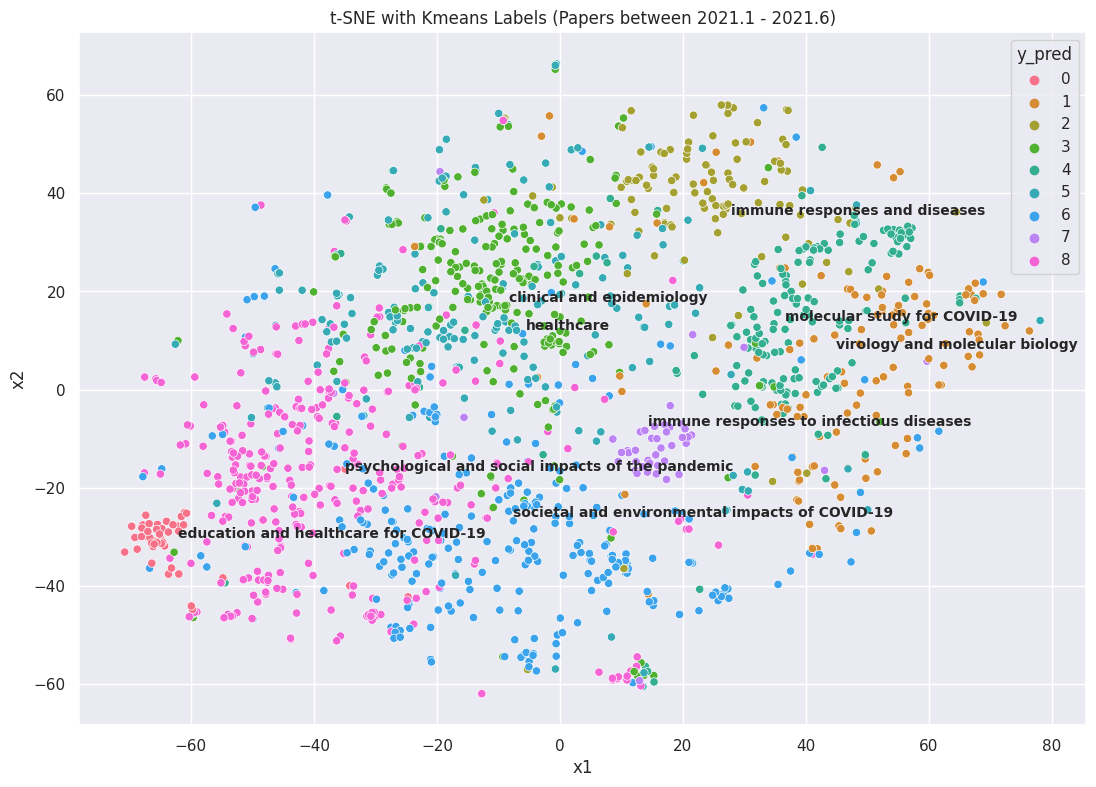

In [ ]:
# plot the graphs between 2021.1-2021.6
df_subset4 = df[(df['publish_time'].dt.year == 2021) & (df['publish_time'].dt.month < 7)]

# plot the graphs
sns.scatterplot(x=df_subset4['x1'], y=df_subset4['x2'], hue=df_subset4['y_pred'], legend='full', palette= palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels (Papers between 2021.1 - 2021.6)')
plt.savefig("improved_cluster_tsne_4.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne_4.png')
plt.show()

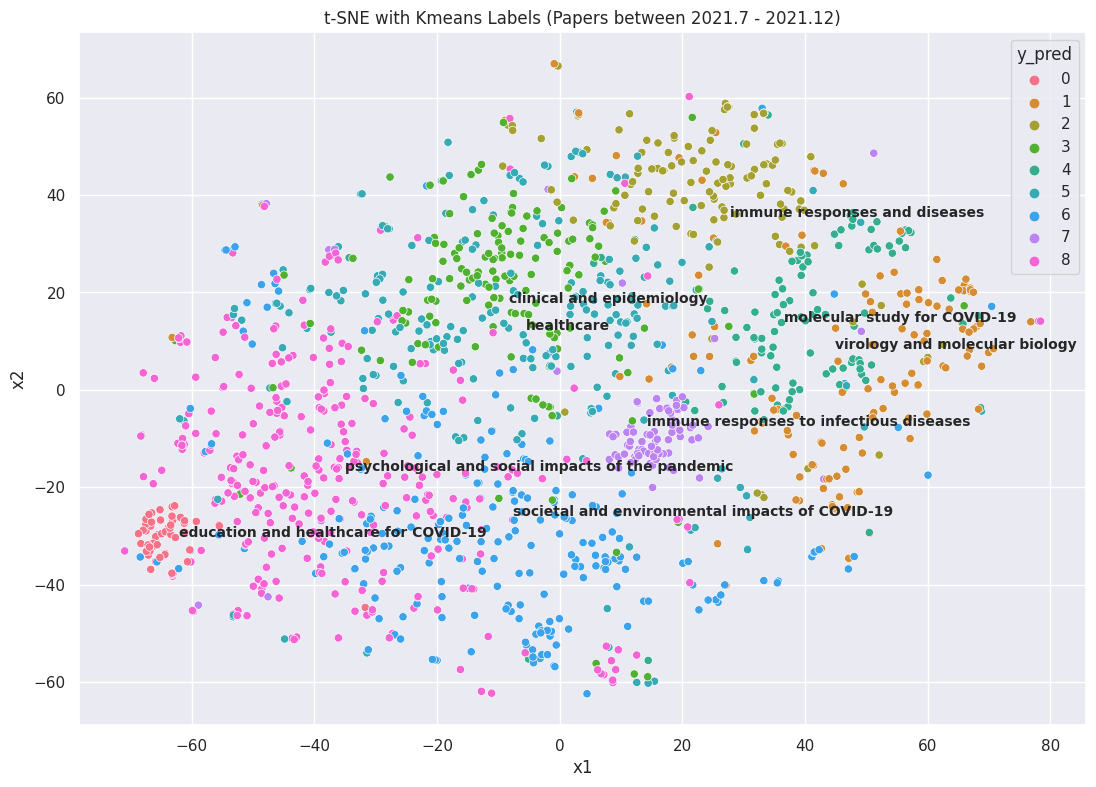

In [ ]:
# plot the graphs between 2021.7 - 2021.12
df_subset5 = df[(df['publish_time'].dt.year == 2021) & (df['publish_time'].dt.month > 7)]

# plot the graphs
sns.scatterplot(x=df_subset5['x1'], y=df_subset5['x2'], hue=df_subset5['y_pred'], legend='full', palette= palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels (Papers between 2021.7 - 2021.12)')
plt.savefig("improved_cluster_tsne_5.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne_5.png')
plt.show()


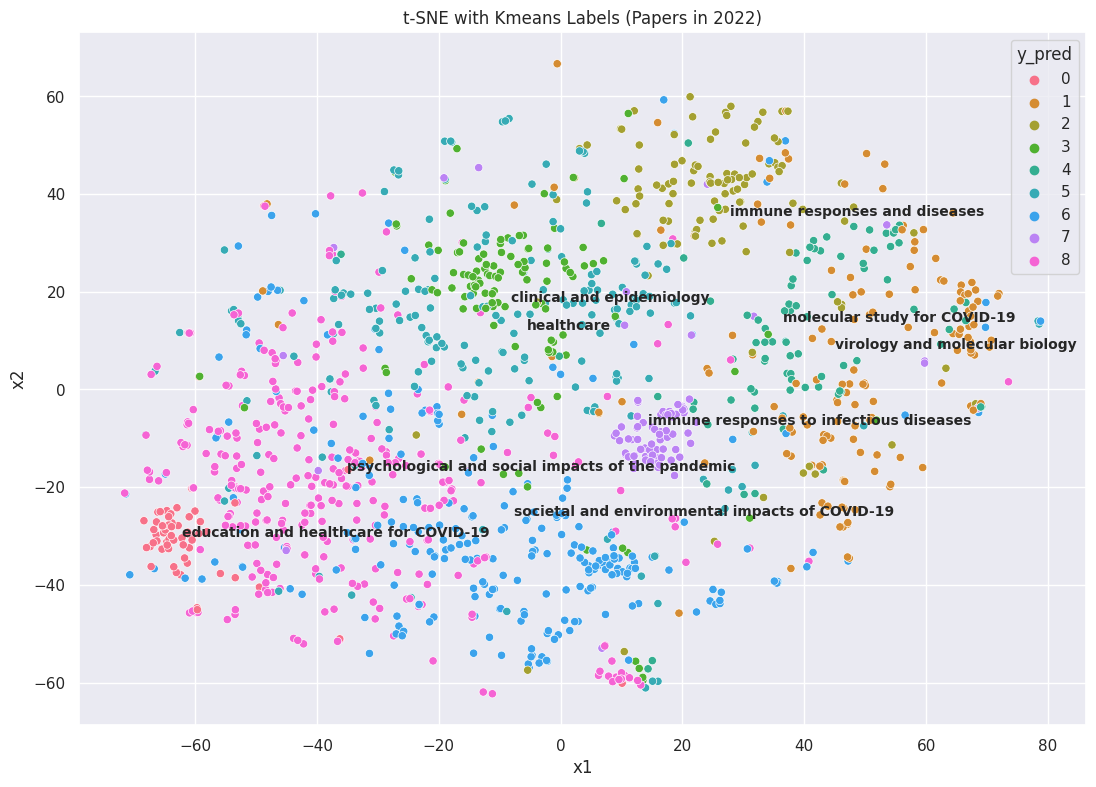

In [ ]:
#plot the graphs for 2022
df_subset6 = df[df['publish_time'].dt.year == 2022]

# plot the graphs
sns.scatterplot(x=df_subset6['x1'], y=df_subset6['x2'], hue=df_subset6['y_pred'], legend='full', palette= palette)
for i in range(len(cluster_labels)):
    # Calculate the centroid for each cluster
    centroid = np.mean(X_embedded[y_pred == i], axis=0)
    # Annotate the centroid with the cluster label
    plt.text(centroid[0], centroid[1], cluster_labels[i], fontsize=10, weight='bold')

plt.title('t-SNE with Kmeans Labels (Papers in 2022)')
plt.savefig("improved_cluster_tsne_6.png")
plt.savefig('/content/drive/My Drive/improved_cluster_tsne_6.png')
plt.show()